# 5* SVM & Kernel Methods 

**现代数字信号处理_张颢 / 笔记**

## 5.1 Support Vector Machine (Vapnik, 1960's)

### 5.1.1 SVM 处理的问题

SVM主要用于处理*分类任务*. 

具体地，我们有如下训练集：$(x_1,y_1),..., (x_n,y_n)$, 希望能够构造一个函数$f(\cdot)$，*s.t.* 
$$f(x_i)=y_i,\\~\textit{  where  } i=1,2,...,n, ~ x_i\in \mathbb{R}^n, ~ y_i\in \{-1,1\} $$

$\diamond$ 

进一步，为了模型的简便性，我们希望构造的函数是线性的，或至少是仿射的 *(Affine)*，即
$$f(x) = w^Tx + b$$

可以认为上述$f(x)$构造了一个超平面 *(Hyperplane)* ，由解析几何知识可知，$w$是超平面的法向量，$b$是超平面的截距。

$\diamond$

### 5.1.2 SVM 的朴素优化目标

**首先定义点$x$到平面的距离$d(x,f)$**

$$d(x,f) = \frac{1}{\|w\|} |w^Tx + b|$$

> $\dagger\text{ Proof.}$
> 
> 已知$w$是平面上的法向量，$x$是平面上的一点，$x_0$是$x$向平面做垂线的垂足，则有
> $$x-x_0 \perp f \Rightarrow x-x_0 \mathop{//} w$$
>
> 故
> 
> $$|w^T(x-x_0)| =|w^Tx-W^Tx_0|\\ = |w^Tx + b| = ||w||\cdot \underbrace{||x-x_0||}_{d(x,f)}$$
> 命题由上式最后一个等号变形即证
> 
> $\square$

**再定义点集$A$到超平面的距离$d(A,f)$**
$$ d(A,f) = \min_{x\in A} d(x,f) $$

将这个距离称为***Margin***

$\diamond$

**下开始推导SVM的优化目标**

在给出上述定义后，我们给出理想超平面的分类准则，即 *希望得到的超平面对任意类别的集合的距离最大*：

$$\begin{aligned}
\max_{w,b}\left ( \frac{w^Tx^{(A)}+b}{||w||} + \frac{w^Tx^{(B)}+b}{||w||} \right ) \quad\quad(1)
\end{aligned}
$$

由对称性，我们有$|w^Tx^{(A)}+b| = |w^Tx^{(B)}+b| := a $，故上(1)式可化为：
$$
\begin{aligned}
\max_{w,b}\left( \frac{2a}{||w||} \right) \quad\quad(2)
\end{aligned}
$$

观察上式，会发现$a$对于超平面的优化是没有影响的；换言之，我们可以通过坐标变换，在不改变超平面的法向量$w$和截距$b$的情况下，改变$a$的值。

因此，我们可以不妨**令$a$归一化为1**. 此时上式变为：
$$
\begin{aligned}
\max_{w,b}\left( \frac{2}{||w||} \right) \Leftrightarrow \min_{w,b}{||w||}  \quad\quad(3)
\end{aligned}
$$

$\diamond$


但是我们还需要在优化问题中指示分类的正误与否。具体而言，对于Margin上的两个点$x^{(1)}$和$x^{(-1)}$，我们希望它们被正确分类，即：
$$
\begin{aligned}
\begin{cases}
w^Tx^{(1)}+b = 1 \\
w^Tx^{(-1)}+b = -1
\end{cases}
\end{aligned}
$$

考虑到，Margin上的点已经是该类别的点中的最小值，则其余点的距离都将大于1. 由此整合，可以得到**正确分类时的条件**：

$$ \begin{aligned}
(w^Tx_i+b)y_i \ge 1 \quad\quad (4)
\end{aligned}
$$

$\diamond$

结合（3）（4）两式，最终得到**正式的（朴素的）分类优化目标**：

$$
\begin{aligned}
\min_{w,b} \quad & ||w|| \\
\textit{s.t.} \quad & y^{(i)}(w^Tx^{(i)} + b) \geq 1, \quad i = 1, \ldots, n
\end{aligned}
$$

$\diamond$

### 5.1.3 SVM 优化目标的数学推导

为了方便，继续对上述优化目标进行变形.

首先该优化目标等价于：
$$
\begin{aligned}
\min_{w,b} \quad & \frac12 ||w||^2 \\
\textit{s.t.} \quad & y^{(i)}(w^Tx^{(i)} + b) \geq 1, \quad i = 1, \ldots, n
\end{aligned}
$$

$\diamond$

为解决这一优化问题，引入***Lagrange Multiplier***，希望优化目标Lagrange函数为：
$$
\begin{aligned}
L^*(w,b,\boldsymbol{\lambda}) = \frac{1}{2}||w||^2 + \sum_{i=1}^m {\lambda}_i \underbrace{\left [- y^{(i)}(w^Tx^{(i)}+b)+ 1\right ]}_{\textit{Penalty}} \quad \ast
\end{aligned}
$$
其中，记$\boldsymbol{\lambda} = [\lambda_1, \lambda_2, \cdots, \lambda_m]^T$. 此外，注意式中*Penalty*项中的符号方向.

$\diamond$


但是$*$中的优化函数存在问题：

- 考虑数据集中远离超平面的数据点，会发现这些点会使得*Penalty*项很负，从而极大地影响了优化的结果
- 然而，事实上超平面的位置并不应该被这些临近点所影响
- ideally，我们只需要优化函数指示分类是否是大于1的即可，对于大于1的case（即不在margin上的点），我们并不关心它们的具体位置。

因此得到修改后的**最终的Lagrange优化函数：**

$$
\begin{aligned}
L(w,b,\boldsymbol{\lambda}) &= \frac{1}{2}||w||^2 + \sum_{i=1}^n \lambda_i \cdot \underbrace{\mathcal{Hinge}\left [ 1 - y^{(i)}(w^Tx^{(i)} + b)\right]  }_{\textit{Nonlinear}}\\
\end{aligned}
$$

其中引入截断函数:
$$ \mathcal{Hinge}(z) = \max(0, z) $$


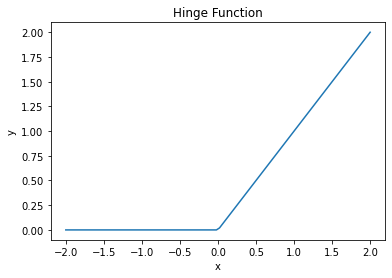

In [3]:
# Hinge Function Plot
import numpy as np
import matplotlib.pyplot as plt 
x = np.linspace(-2, 2, 100)
y = np.maximum(0, x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Hinge Function')
plt.show()

### 5.1.4 SVM 优化目标的高级凸优化处理变形

#### 处理1：Squeezing / Relaxing （去除非线性部分）

首先，继续整理上述优化内容，得到：

$$
\begin{aligned}
 [\dagger^1]:\quad 
\min_{w,b,z} \quad & \frac{1}{2} ||w||^2 + \sum_{i=1}^n z_i \\
\textit{s.t.} \quad &  z_i \geq 1 - y^{(i)} (w^T x^{(i)} + b), \quad i = 1, \ldots, n \quad\quad \\
& z_i \geq 0, \quad i = 1, \ldots, n
\end{aligned}
$$

下给出两个*intuition*试图对上述内容进行直观上的解释.

##### \# Intuition 1 - *Squeezing*

- 上述优化内容中，$\frac12||w||^2$表示对是需要优化的margin，后面$\sum z_i$是penalty.

- 由于$\sum z_i$ 的加入，我们在优化中我们希望这一项尽可能的小（但至少要大于等于0）
  - 而我们又可以近似将$z_i$看作是$1-y_i(w^Tx_i+b)$的*inf*
  - 因此在不断缩小$z_i$的同时，我们就在不断缩小 *(squeezing)*  $1-y_iw^Tx_i$，也就是在不断增大margin

##### \# Intuition 2 - *Relaxing*

首先有下列事实：

$$\begin{aligned}
& z_i \ge 1-y_i\cdot (w^Tx_i+b) \ge 0 
\\ \Leftrightarrow ~& \quad y_i\cdot(w^Tx_i+b) \ge 1-z_i
\end{aligned}
$$

而这一事实可以理解为：

- 我们可以放宽原先的 $y_i(w^Tx_i+b) \ge 1$ 约束，允许一些误分类的点存在；即将原约束放宽为：$ y_i(w^Tx_i+b) \ge 1-z_i$，其中 $z_i \ge 0$
- 接着我们希望误分类的情况尽可能少的出现，即最小化 $\sum_{i=1}^m z_i$


> ***Squeezing* 和 *Relaxing* 都是在优化中常见的处理非线性等复杂情况等手段。**

#### 处理2：Lagrange Duality

##### Lagrange Duality的一般原理

一般地，有下列约束问题：

$$\begin{aligned}
\min_{x} \quad & f_0(x) \\
\text{s.t.} \quad & g_i(x) \leq 0, \quad i = 1, \ldots, n \\
& h_i(x) = 0, \quad i = 1, \ldots, m
\end{aligned}$$

得到对应的拉格朗日函数：

$$ \begin{aligned}
L(x, \lambda, \mu) &= f_0(x) + \sum_{i=1}^n \lambda_i g_i(x) + \sum_{i=1}^m \mu_i h_i(x) 
\end{aligned}
$$

$\diamond$


为了解决上述优化问题，可以将Lagrange函数处理成Inner和Outer两个优化问题：

***Inner Optimization Problem ( 对$L$关于$x$进行优化 )***:

$$x^*_{\lambda,\mu} = \arg\min_{x\in D} L(x,\lambda,\mu)$$

***Outer Optimization Problem ( 对$L$关于$\lambda,\mu$进行优化 )***:

代入上面已经得到的最优化$x^*$,进行优化有

$$\lambda^*,\mu^* = \arg\max_{\lambda,\mu} L(x^*_{\lambda,\mu},\lambda,\mu)$$

**这是一个*Minimax*的策略**，下对其合理性给出理解：

> $\dagger \text{ Explanation.}$
> 
> 首先当$x\in D$即处于可行域中时，我们一定恒有
> $$f_0(x)\ge f_0(x) +\underbrace{  \sum \lambda_i g_i}_{g_i\le 0} + \underbrace{ \sum \mu_i h_i}_{h_i=0} \quad\quad \text{(1)}$$
>
> 而LHS就是我们的*Lagrange Function*，即$f_0(x)\ge L$，由此得到了$L$的一个*sup*.
>
> 由此我们推出，定有：
>
> $$f_0(x) \ge \min_{x\in D} L(x, \lambda, \mu) ,\quad \forall x\in D \quad\quad \text{(2)}$$
>
> 进一步，亦有：
>
> $$\min_{x\in D} f_0(x) \ge \min_{x\in D} L(x, \lambda, \mu) \quad\quad \text{(3)}$$
>
> 当控制住了$x$的取值时，再改变$\lambda,\mu$将不会再改变(3)中的符号方向，故有
>
> $$\min_{x\in D} f_0(x) \ge \max_{\lambda,\mu}\min_{x\in D} L(x, \lambda, \mu) \quad\quad \text{(4)}$$
>
> 而上式中对$\lambda,\mu$取$\max$的原因是，$f_0(x)$是我们的优化目标，在满足约束条件的前提下，我们希望最终优化的结果可以尽可能的接近$f_0(x)$.
>


$\diamond$




说明：
- 在满足一定条件下，(4)中的不等号将严格取等，即对于Lagrange Function的 Minimax策略最终完全逼近其*sup*
- 我们称该条件为***Slater's Condition***（具体条件内容略）
- 对于能够严格取等的情况，称之为*Strong Duality*，反之则为*Weak Duality*.

$\diamond$

进一步处理，首先恒有如下不等式（即全局最小值定不大于局部最小）：

$$f_0(x) \ge \min_{x\in D}L(x,\lambda,\mu) \ge \min_{x}L(x,\lambda,\mu) $$

代入到上述(3)(4)中，就可以将约束优化转化为无约束优化：
$$\min_{x\in D} f_0(x) \ge \min_{x} L(x, \lambda, \mu) \quad\quad \text{(3*)}
\\
\min_{x\in D} f_0(x) \ge \max_{\lambda,\mu}\min_{x} L(x, \lambda, \mu) \quad\quad \text{(4*)}
$$

可以证明，对于满足*Slater's Condition*的情况，等号依然可以严格取到。

##### 一个例子

考虑如下的优化问题：*寻找一个经过$x$的平面使得经过远点的距离是最小的，即*
$$\begin{aligned}
\min_{w,b} \quad & \frac12||w||^2 \\
\text{s.t.} \quad & w^Tx+b=0
\end{aligned}$$


> $\dagger$ **Solution**
>
> *构造Lagrange Function:*
>
> $$ L(w,b,\lambda) = \frac{1}{2}||w||^2 + \lambda(w^Tx+b)$$
> 
> *再构造对偶问题：*
>
> - *Inner Optimization*
>
> $$ \nabla_w L(w,b,\lambda) = w + \lambda x = 0 \\ \Rightarrow w^* = -\lambda x$$
> 
> - *Outer Optimization*
>  
> $$ L_{\omega^*}(\lambda) = -\frac12(x^Tx)\lambda^2+\lambda b \\ \Rightarrow \lambda^* = \arg\min_\lambda L_{\omega^*}(\lambda)  $$




**评价**

上例很好地体现了Lagrange Dual Problem的优势：其有效地将原问题转化为了Inner和Outer两个相对更好解决的问题：
- Inner Problem由前面的证明已知，是一个无约束问题
- Outer Problem 在代入Inner Problem之后得到了一个更为简单的优化问题。

##### Lagrange Duality 处理 SVM 的优化问题

回忆，原SVM优化问题为：
$$
\begin{aligned}
 [\dagger^1]:\quad 
\min_{w,b,z} \quad & \frac{1}{2} ||w||^2 + \sum_{i=1}^n z_i \\
\textit{s.t.} \quad &  z_i \geq 1 - y^{(i)} (w^T x^{(i)} + b), \quad i = 1, \ldots, n \quad\quad \\
& z_i \geq 0, \quad i = 1, \ldots, n
\end{aligned}
$$

写作 Lagrange Multiplier form:
$$
\begin{aligned}
L(w,b,z,\lambda,c) &= \frac12 ||w||^2 + \sum_{i=1}^n z_i + \sum_{i=1}^n c_iz_i+ \sum_{i=1}^n \lambda_i(z_i - (1 - y_i (w^T x_i + b)))
\\&= \frac12 w^Tw + \sum_{i=1}^n (1+c_i+\lambda_i)z_i - \sum_{i=1}^n \lambda_i (1 - y_i (w^T x_i + b))
\end {aligned}
$$

进行Lagrange Duality：
- *Inner Problem*
    $$\begin{align*}
    \begin{cases}
    \nabla_w L(w,b,z,\lambda,c) = w+ \sum_{i=1}^n \lambda_i y_i x_i = 0 \\
    \nabla_b L(w,b,z,\lambda,c) = \sum_{i=1}^n \lambda_i y_i = 0 \\
    \lambda_z L(w,b,z,\lambda,c) = 1+c_i+\lambda_i = 0 \quad i=1,\cdots,n \\
    \end{cases}
    \end{align*}$$

- *Outer Problem*
  
    Bring the inner problem into the outer problem:
    
    $$\begin{align*}
    L(w,b,z,\lambda,c) &= \frac{1}{2}w^Tw + w^T ( \sum_{i=1}^n \lambda_i y_i x_i ) + \sum_{i=1}^n \lambda_i \\
    &= \frac{1}{2} \left( -\sum_{i=1}^n \lambda_i y_i x_i \right)^T \left( -\sum_{i=1}^n \lambda_i y_i x_i \right) + \left( -\sum_{i=1}^n \lambda_i y_i x_i \right)^T \left( \sum_{i=1}^n \lambda_i y_i x_i \right) + \sum_{i=1}^n \lambda_i \\
    &= -\frac12 \left( \sum_{i=1}^n \lambda_i y_i x_i \right)^T \left( \sum_{i=1}^n \lambda_i y_i x_i \right) + \sum_{i=1}^n \lambda_i \\
    &= -\frac12 \sum_{i=1}^n \sum_{j=1}^n  (y_i y_j x_i^T x_j)\lambda_i \lambda_j + \sum_{i=1}^n \lambda_i \\
    & \textit{subject to} \quad \sum_{i=1}^n \lambda_i y_i = 0 
    \end{align*}$$

- 故得到最终的对偶优化问题：
    $$\begin{align*}
    \max_{\lambda} \quad & -\frac12 \sum_{i=1}^n \sum_{j=1}^n  (y_i y_j x_i^T x_j)\lambda_i \lambda_j + \sum_{i=1}^n \lambda_i \\
    \textit{subject to} \quad & \sum_{i=1}^n \lambda_i y_i = 0 \\
    \end{align*}$$

    而这一对偶问题是一个非常典型的二次规划问题(Quadratic Programming Problem)，具有成熟的算法可以解决，因此我们可以认为已经得到了最优解$\lambda^*$，进而可以得到最优的$w^*$和$b^*$。

**我们称这一约束问题为*支持向量机***。

### 5.1.5 关于SVM的两个说明

1. 最终得到的决策超平面为：
    $$f(x) = w^Tx+b = \sum_{i=1}^n \lambda_i y_i x_i^Tx + b$$

2. 关于支持向量：
   通过优化计算可以发现，最终得到的$\lambda^*$是稀疏的（sparse），即只有少数的$\lambda_i$不为0，这些$\lambda_i$对应的样本点$x_i$就是支持向量，它们是决策超平面的关键点。事实上，这些支持向量就是接近决策边界的点，它们“支持”着决策边界。
   

## 5.2 Kernels

### 5.2.1 SVM的问题：非线性可分

在前面的SVM分类问题中，我们规定这里的数据集是线性可分的（Linearly separable），但实际情况往往不是这样的，例如下图就是一个线性不可分的例子：

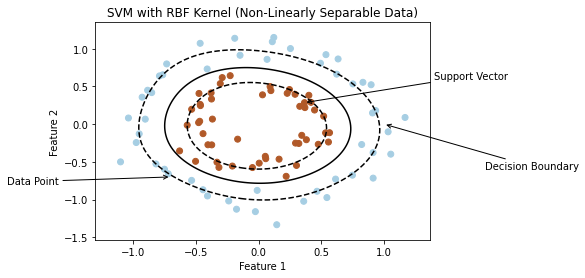

In [43]:
# 一个线性不可分的SVM数据集实例

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# 设置随机数种子
np.random.seed(0)

# 生成一个线性不可分的数据集（环状）
X, y = datasets.make_circles(n_samples=100, factor=0.5, noise=0.1)

# 创建一个支持向量机模型，使用径向基函数（RBF）作为核函数
svm = SVC(kernel='rbf', C=1)

# 拟合模型
svm.fit(X, y)

# 生成网格点以绘制决策边界
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 0.2, X[:, 0].max() + 0.2, 100),
                     np.linspace(X[:, 1].min() - 0.2, X[:, 1].max() + 0.2, 100))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制数据点
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# 绘制决策边界和支持向量
plt.contour(xx, yy, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-1, 0, 1])

# 添加元素说明
plt.xlabel('Feature 1')  # x轴标签
plt.ylabel('Feature 2')  # y轴标签
plt.title('SVM with RBF Kernel (Non-Linearly Separable Data)')  # 图标题
plt.annotate('Support Vector', xy=(X[10, 0], X[10, 1]), xytext=(1.4, 0.6),
             arrowprops=dict(arrowstyle='->'))  # 支持向量示例
plt.annotate('Decision Boundary', xy=(1.0, 0.0), xytext=(1.8, -0.6),
             arrowprops=dict(arrowstyle='->'))  # 决策边界示例
plt.annotate('Data Point', xy=(-0.7, -0.7), xytext=(-2.0, -0.8),
             arrowprops=dict(arrowstyle='->'))  # 数据点示例

plt.show()


在上面这个例子中，我们无法写出一个线性方程完成这样的分类任务。但是可以写出一个类似如下的非线性方程：
$$x_1^2 + x_2^2 - \sqrt{2}x_1x_2  > 0$$

核函数这里就希望继承SVM的线性结论，去处理更general的非线性的情况。

### 5.2.2 问题的解决：$\phi$的高维映射

参考SVM的内容，我们发现我们并不真正关注数据的具体取值，而更关注的是其内积的值。

依然参考上面的例子，构造一个函数$\phi$，使得
$$ \mathbb{R^2} \rightarrow^\phi \mathbb{R^3}$$

具体地，令

$$ \phi\left(\left[\begin{matrix}x_1 \\ x_2 \end{matrix}\right] \right)= \left[\begin{matrix}x_1^2 \\ x_2^2 \\ \sqrt{2}x_1x_2\end{matrix}\right] := \left[\begin{matrix}y_1 \\ y_2 \\ y_3\end{matrix}\right]$$


这时我们便将一个二维的空间映射到了一个更高的三维空间，而这时我们便可以得到了一个线性的超平面，即
$$ y_1+y_2-y_3 < 0 $$

而这时的SVM的优化问题就变为：

$$ \begin{aligned}
[\dagger^1]\quad 
\max_\lambda \quad & -\frac{1}{2}\sum_{i=1}^n\sum_{j=1}^n\left( y_i y_j \phi(x_i)^T\phi(x_j) \right)\lambda_i\lambda_j - \sum_{i=1}^n\lambda_i \\
s.t. \quad & \sum_{i=1}^n\lambda_iy_i = 0 \\ 
\end{aligned} $$

这时在高维空间的线性分类器（超平面）为：

$$ [\dagger^2] \quad f(x) = - \sum_{i=1}^n\lambda_iy_i\phi(x_i)^T\phi(x) + b $$

### 5.2.3 $\phi$的确定

而这时又引出了一个新的问题：$\phi$的形式的求解与确定，即我们在面对一个Raw Data时并不知道该如何具体地确定$\phi$的形式。

然而这里希望通过下例直观说明，我们可以在不知道$\phi$的具体形式的情况下，通过核函数的方法来得到高维空间的数据，进而进行处理。具体地，沿用上述的数据例子，我们代入$\phi(\cdot)$，发现有：

$$\begin{aligned}
\phi(x_i)^T\phi(x_j) &= x_{i1}^2x_{j1}^2+ x_{i2}^2x_{j2}^2 + 2x_{i1}x_{i2}x_{j1}x_{j2} + 2x_{i1}x_{j1} x_{i2}x_{j2}  \\&=  (x_{i1}x_{j1} + x_{i2}x_{j2})^2 \\&= (x_i^Tx_j)^2
\end{aligned}$$ 

也就是说，对于一个给定的映射函数$\phi$，其最终的计算结果在整理后可以表示为一个内积的形式；反而言之，一个内积便也对应着一种高维的映射关系。因此这里我们就可以通过尝试不同的内积形式，来间接地得到不同的映射函数$\phi$，进行数据的高维处理。而这里的内积关系便称作***Kernel***，即核函数。


### 5.2.4 Kernel Trick SVM



在具体的实践中有如下两步：
1. 选定一个合适的Kernel
2. 在高维空间使用SVM

这里的Kernel是多种多样的，我们通过不断尝试找到拟合效果最优的kernel，从而训练模型。常见的kernel有：
1. Polynomial kernel
   $$k(x_i, x_j) = (x_i^Tx_j + 1)^d , \quad d = 2,3,\dots$$
2. Radial Basis
   - e.g. Gaussian Kernel
        $$ k(x_i, x_j) = \exp(-\frac{||x_i - x_j||^2}{2\sigma^2})$$
        其中$\sigma$为可调的超参数

### 5.2.5 More Applications of Kernel Tricks

除了SVM外，还有许多常见的数据处理手段都可以应用Kernel Trick，例如：

**OLS**

我们知道，在ols中，
$$\hat\beta = (X^TX)^{-1}X^Ty$$
而这里的$X^TX,X^Ty$都是一种广义的内积矩阵，因此我们同样可以选择不同的kernel，将其替换为$k(X,X),k(X,Y)$ 来进行更高维的计算

**Normalization**

例如以Ridge Regression为例，同样也可以用类似的技巧处理高维的非线性目标。